$$CONCEITO:$$

- **Os atributos no topo da árvore são os mais importantes para descrever o comportamento da variável Target, seguindo uma ordem de importância**


- **Para construir uma árvore de decisão usamos 2 formulas importantes: Entropia e Ganho de informação, com elas você consegue descobrir quais variáveis são mais importantes para explicar a variável Target**


**Entropia:** 

- Quanto mais equilibrado os dados estiverem da variavel Target mais distante do valor 0 vai estar, lembrando que caso a arvore de decisão acerte todos os dados a entropia será 0


**Ganho da Informação:** 
    
- Importância do atributo na base de dados, é o quanto da entropia da variavel Y será diminuída com o acréscimo de um variavel Explicativa


**Pruning:** 
    
- Eliminar alguns Nós da Árvore para evitar Overfitting


**Regra de Parada:**

- Os parâmetros usados para regra de parada são Índice Gini , Qui-Quadrado ,Ganho de Informação e Redução de Variância


**Tipo de Distribuição:**

- Não Paramétrica



**Passo a Passo para construção da Árvore de decisão com ganho de informação:**

- **1° Calcular o valor da entropia da variável target**

- **2° Calcular o valor do ganho de informação da variável explicativa**

- **3° Verificar qual variável explicativa tem o maior ganho de informação para ser o nó raiz da árvore**

- **4° Após a escolha do nó raiz, repetir o passo 1 a 3 e escolher a próxima variável explicativa**


- **Obs:** Podem haver variáveis que não tem valor significante no ganho de informação, podendo ficar de fora da árvore





In [1]:
#Pacotes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Carregar Banco de dados

In [2]:
# Carregando o dataset
dados = pd.read_csv('decisao.csv',encoding='latin1',sep=';')
dados

,Historico_Credito,Divida,Garantias,Renda_Anual,Risco
0,Ruim,Alta,Nenhuma,<15.000,Alto
1,Desconhecida,Alta,Nenhuma,>=15.000 a <=35.000,Alto
2,Desconhecida,Baixa,Nenhuma,>=15.000 a <=35.000,Moderado
3,Desconhecida,Baixa,Nenhuma,>35.000,Alto
4,Desconhecida,Baixa,Nenhuma,>35.000,Baixo
5,Desconhecida,Baixa,Adequada,>35.000,Baixo
6,Ruim,Baixa,Nenhuma,<15.000,Alto
7,Ruim,Baixa,Adequada,>35.000,Moderado
8,Boa,Baixa,Nenhuma,>35.000,Baixo
9,Boa,Alta,Adequada,>35.000,Baixo


**São 14 observações e 5 variáveis**

# Calcular a entropia da varáriavel target

In [3]:
# Calcular a Entropia da Varariavel Y


#Probabilidades de cada classe da variável Target
prob_Risco_alto = len(dados.loc[(dados['Risco'] =='Alto')])/len(dados)
prob_Risco_mod = len(dados.loc[(dados['Risco'] =='Moderado')])/len(dados)
prob_Risco_baixo = len(dados.loc[(dados['Risco'] =='Baixo')])/len(dados)

#Formula da Entropia na variável target
entropia_pai = ((-prob_Risco_alto*np.log2(prob_Risco_alto)-(prob_Risco_mod*np.log2(prob_Risco_mod))-
                 (prob_Risco_baixo*np.log2(prob_Risco_baixo))))


print(f'Probabilidade de Risco Alto  = {round(prob_Risco_alto,2)}')
print(f'Probabilidade de Risco Moderado = {round(prob_Risco_mod,2)}')
print(f'Probabilidade de Risco Baixo = {round(prob_Risco_baixo,2)}\n')
print(f'Valor da entropia da variavel Target = {round(entropia_pai,2)}')


Probabilidade de Risco Alto  = 0.43
Probabilidade de Risco Moderado = 0.21
Probabilidade de Risco Baixo = 0.36

Valor da entropia da variavel Target = 1.53


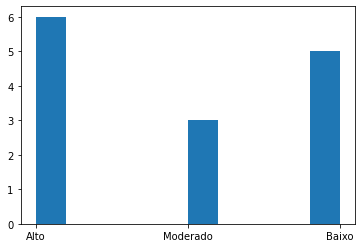

In [44]:
#Histograma
plt.hist(dados.Risco);

**Observe que o valor das classes são equilibrados, portanto a entropia é alta**

# Ganho de Informação:

**Para diminuir a entropia nos dados da variavel target, temos que adicionar variáveis explicativas e calcular seu ganho de informação, a variável que tiver o maior valor será o nó raiz e ficará no topo da árvore, seguindo a ordem até o nó folha que deixará os dados mais puro possível (Entropia próxima de 0)**

## 1° Passo: Calcular as probabilidade de cada classe da variável explicativa

### Variável Historico_Credito

- **Temos 3 classes na variável 'Historico_Credito': Boa, Desconhecida, Ruim**


- **Cada classe da variável 'Historico_Credito', pode ser de uma classe da variável Target, precisamos calcular as probabilidades de cada classe**





In [4]:
#Calculo das probabilidade


#Risco quando o Historico_Credito for Desconhecida

#Total
total_Desc = len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')])

#alto
Hist_Desc_alto = (len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')&(dados['Risco']=='Alto')]))/total_Desc
#Moderado
Hist_Desc_mod = (len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')&(dados['Risco']=='Moderado')]))/total_Desc
#Baixo
Hist_Desc_Baixo = (len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')&(dados['Risco']=='Baixo')]))/total_Desc


#Risco quando o Historico_Credito for Ruim

#Total
total_ruim = len(dados.loc[(dados['Historico_Credito'] =='Ruim')])

#Alto
Hist_ruim_alto = (len(dados.loc[(dados['Historico_Credito'] =='Ruim')&(dados['Risco']=='Alto')]))/total_ruim
#Moderado
Hist_ruim_mod = (len(dados.loc[(dados['Historico_Credito'] =='Ruim')&(dados['Risco']=='Moderado')]))/total_ruim
#Baixo
Hist_ruim_Baixo = (len(dados.loc[(dados['Historico_Credito'] =='Ruim')&(dados['Risco']=='Baixo')]))/total_ruim

#Risco quando o Historico_Credito for Boa
#Total
total_boa = len(dados.loc[(dados['Historico_Credito'] =='Boa')])

#Alto
Hist_boa_alto = (len(dados.loc[(dados['Historico_Credito'] =='Boa')&(dados['Risco']=='Alto')]))/total_boa
#Moderado
Hist_boa_mod = (len(dados.loc[(dados['Historico_Credito'] =='Boa')&(dados['Risco']=='Moderado')]))/total_boa
#Baixo
Hist_boa_Baixo = (len(dados.loc[(dados['Historico_Credito'] =='Boa')&(dados['Risco']=='Baixo')]))/total_boa

#total de dados Var Historico_Credito
total_Historico_Credito = len(dados)

print('Medidas Calculadas em Porcentagem (%)\n')

print(f'Historico_Credito Desconhecida e Risco Alto = {round(Hist_Desc_alto*100,1)}%')
print(f'Historico_Credito Desconhecida e Risco Moderado = {round(Hist_Desc_mod*100,1)}%')
print(f'Historico_Credito Desconhecida e Risco Baixo = {round(Hist_Desc_Baixo*100,1)}%\n')

print(f'Historico_Credito Ruim e Risco Alto = {round(Hist_ruim_alto*100,1)}%')
print(f'Historico_Credito Ruim e Risco Moderado = {round(Hist_ruim_mod*100,1)}%')
print(f'Historico_Credito Ruim e Risco Baixo = {round(Hist_ruim_Baixo*100,1)}%\n')

print(f'Historico_Credito Boa e Risco Alto = {round(Hist_boa_alto*100,1)}%')
print(f'Historico_Credito Boa e Risco Moderado = {round(Hist_boa_mod*100,1)}%')
print(f'Historico_Credito Boa e Risco Baixo = {round(Hist_boa_Baixo*100,1)}%\n')

print(f'Total de observações = {total_Historico_Credito} ')

Medidas Calculadas em Porcentagem (%)

Historico_Credito Desconhecida e Risco Alto = 40.0%
Historico_Credito Desconhecida e Risco Moderado = 20.0%
Historico_Credito Desconhecida e Risco Baixo = 40.0%

Historico_Credito Ruim e Risco Alto = 75.0%
Historico_Credito Ruim e Risco Moderado = 25.0%
Historico_Credito Ruim e Risco Baixo = 0.0%

Historico_Credito Boa e Risco Alto = 20.0%
Historico_Credito Boa e Risco Moderado = 20.0%
Historico_Credito Boa e Risco Baixo = 60.0%

Total de observações = 14 


## 2° passo calcular o valor da Entropia_filho

- **Após calcular as probabilidades de cada classe da variável explicativa X target, temos que fazer o cálculo da entropia**

In [5]:
#Variável Historico_Credito - classe = Desconhecida

entropia_Hist_Desc = (-Hist_Desc_alto*np.log2(Hist_Desc_alto)-(Hist_Desc_mod*np.log2(Hist_Desc_mod))-
                      (Hist_Desc_Baixo*np.log2(Hist_Desc_Baixo)))
entropia_Hist_Desc

1.5219280948873621

In [6]:
#Variável Historico_Credito - classe = Ruim
import warnings
warnings.filterwarnings('ignore')

entropia_Hist_ruim = (-Hist_ruim_alto*np.log2(Hist_ruim_alto)-(Hist_ruim_mod*np.log2(Hist_ruim_mod))-
                      (Hist_ruim_Baixo*np.log2(Hist_ruim_Baixo)))
entropia_Hist_ruim

nan

**Note que quando uma das classes da variavel explicativa contém 0 de probabilidade o resultado é NaN, pois qualquer número dividido ou multiplicado por 0 não existe, portanto precisamos deixar o número 0 com um valor simbólico ou retirar a variavel da formula**

In [7]:
#Multiplicando a classe ruim por um valor simbolico
Hist_ruim_Baixo = 0.0001

#Calcular a entropia novamente
entropia_Hist_ruim = (-Hist_ruim_alto*np.log2(Hist_ruim_alto)-(Hist_ruim_mod*np.log2(Hist_ruim_mod))-
                      (Hist_ruim_Baixo*np.log2(Hist_ruim_Baixo)))
entropia_Hist_ruim

0.8126068956970878

**Multiplicando a classe ruim da variável Historico_Credito por um valor simbólico**

In [8]:
#Variável Historico_Credito - classe = Boa
#Entropia_filho = Observaçoes da Var X
entropia_Hist_boa = (-Hist_boa_alto*np.log2(Hist_boa_alto)-(Hist_boa_mod*np.log2(Hist_boa_mod))-
                     (Hist_boa_Baixo*np.log2(Hist_boa_Baixo)))
entropia_Hist_boa

1.3709505944546687

## 3° passo calcular o peso de cada classe da variável explicativa

- **Peso_filho = num_amostra_filho/ num_amostra_pai**

In [9]:
#Variável Historico_Credito - classe = Desconhecida

peso_hist_desc = len(dados.loc[(dados['Historico_Credito'] =='Desconhecida')]) / len(dados)
print(f'Peso da variavel Historico de credito com o atribuito Desconhecida = {peso_hist_desc}')

Peso da variavel Historico de credito com o atribuito Desconhecida = 0.35714285714285715


In [10]:
#Variável Historico_Credito - classe = Ruim

peso_hist_ruim = len(dados.loc[(dados['Historico_Credito'] =='Ruim')]) / len(dados)
print(f'Peso da variavel Historico de credito com o atribuito Ruim = {peso_hist_ruim}')

Peso da variavel Historico de credito com o atribuito Ruim = 0.2857142857142857


In [11]:
#Variável Historico_Credito - classe = Boa

peso_hist_boa = len(dados.loc[(dados['Historico_Credito'] =='Boa')]) / len(dados)
print(f'Peso da variavel Historico de credito com o atribuito Boa = {peso_hist_boa}')

Peso da variavel Historico de credito com o atribuito Boa = 0.35714285714285715


## 4° passo calcular o Ganho de Informação da variavel Historico_Credito

In [12]:
ganho_inf_hist = (entropia_pai-(peso_hist_desc *entropia_Hist_Desc+
                                peso_hist_ruim *entropia_Hist_ruim+
                                peso_hist_boa*entropia_Hist_boa))
print(f'Ganho de Informação: {round(ganho_inf_hist,3)}')

Ganho de Informação: 0.265


**Com a entropia da variavel Target sendo 1.53, quando adicionamos a variavel 'Historico de Credito' conseguimos diminuir a entropia em 0.26**

# Ganho de Informação da variável 'Garantias':

## 1° Passo: Calcular as probabilidades de cada classe da variável explicativa

In [13]:
#Calculo das probabilidade

#Risco quando a Garantias for Nenhuma
#Total
total_nen = len(dados.loc[(dados['Garantias'] =='Nenhuma')])

#alto
Garant_nen_alto = (len(dados.loc[(dados['Garantias'] =='Nenhuma')&(dados['Risco']=='Alto')]))/total_nen 
#Moderado
Garant_nen_mod = (len(dados.loc[(dados['Garantias'] =='Nenhuma')&(dados['Risco']=='Moderado')]))/total_nen 
#Baixo
Garant_nen_Baixo = (len(dados.loc[(dados['Garantias'] =='Nenhuma')&(dados['Risco']=='Baixo')]))/total_nen 


#Risco quando a Garantias for Adequada

#Total
total_adeq = len(dados.loc[(dados['Garantias'] =='Adequada')])

#Alto
Garant_adeq_alto = (len(dados.loc[(dados['Garantias'] =='Adequada')&(dados['Risco']=='Alto')]))/total_adeq
#Moderado
Garant_adeq_mod = (len(dados.loc[(dados['Garantias'] =='Adequada')&(dados['Risco']=='Moderado')]))/total_adeq
#Baixo
Garant_adeq_Baixo = (len(dados.loc[(dados['Garantias'] =='Adequada')&(dados['Risco']=='Baixo')]))/total_adeq


#total de dados Var Garantias
total_garantias = len(dados)

print('Medidas Calculadas em Porcentagem (%)\n')

print(f'Nenhuma Garantias e Risco Alto = {round(Garant_nen_alto*100,1)}%')
print(f'Nenhuma Garantias e Risco Moderado = {round(Garant_nen_mod*100,1)}%')
print(f'Nenhuma Garantias e Risco Baixo = {round(Garant_nen_Baixo*100,1)}%\n')

print(f'Garantia adequada e Risco Alto = {round(Garant_adeq_alto*100,1)}%')
print(f'Garantia adequada e Risco Moderado = {round(Garant_adeq_mod*100,1)}%')
print(f'Garantia adequada e Risco Baixo = {round(Garant_adeq_Baixo*100,1)}%\n')


print(f'Total = {total_garantias} ')

Medidas Calculadas em Porcentagem (%)

Nenhuma Garantias e Risco Alto = 54.5%
Nenhuma Garantias e Risco Moderado = 18.2%
Nenhuma Garantias e Risco Baixo = 27.3%

Garantia adequada e Risco Alto = 0.0%
Garantia adequada e Risco Moderado = 33.3%
Garantia adequada e Risco Baixo = 66.7%

Total = 14 


## 2° passo calcular o valor da Entropia_filho

In [14]:
#Variável Garantia - classe = Nenhuma

entropia_Garant_nem = (-Garant_nen_alto*np.log2(Garant_nen_alto)-(Garant_nen_mod*np.log2(Garant_nen_mod))-
                       (Garant_nen_Baixo*np.log2(Garant_nen_Baixo)))
entropia_Garant_nem

1.4353713907745331

In [15]:
#Variável Garantia - classe = Adequada

# Deixar o atributo com um valor minimo para não gerar NaN
Garant_adeq_alto = 0.0001

entropia_Garant_adeq = (-Garant_adeq_alto*np.log2(Garant_adeq_alto)-(Garant_adeq_mod*np.log2(Garant_adeq_mod))-
                        (Garant_adeq_Baixo*np.log2(Garant_adeq_Baixo)))
entropia_Garant_adeq

0.9196246052924445

## 3° passo calcular o peso de cada classe da variável explicativa

In [16]:
#Variável Garantia - classe = Nenhuma

peso_Garant_nen = len(dados.loc[(dados['Garantias'] =='Nenhuma')]) / len(dados)
print(f'Peso da variavel Garantia com o atribuito Nenhuma = {peso_Garant_nen}')

Peso da variavel Garantia com o atribuito Nenhuma = 0.7857142857142857


In [17]:
#Variável Garantia - classe = Adequada

peso_Garant_adeq = len(dados.loc[(dados['Garantias'] =='Adequada')]) / len(dados)
print(f'Peso da variavel Garantia com o atribuito Adequada = {peso_Garant_adeq}')

Peso da variavel Garantia com o atribuito Adequada = 0.21428571428571427


## 4° passo calcular o  Ganho de Informação da variável 'Garantias' 

In [18]:
ganho_inf_gar = entropia_pai-(peso_Garant_nen *entropia_Garant_nem+peso_Garant_adeq *entropia_Garant_adeq )
print(f'Ganho de Informação: {round(ganho_inf_gar,3)}')

Ganho de Informação: 0.206


**Com a entropia da variável Target sendo 1.53, quando adicionamos a variavel Garantias conseguimos diminuir a entropia em 0.20**

# Ganho de Informação da variável 'Divida':

In [19]:
#Calculo das probabilidade

#Risco quando a Divida for Alta

#Total
total_alta= len(dados.loc[(dados['Divida'] =='Alta')])

#alto
Div_alta_alto = (len(dados.loc[(dados['Divida'] =='Alta')&(dados['Risco']=='Alto')]))/total_alta
#Moderado
Div_alta_mod = (len(dados.loc[(dados['Divida'] =='Alta')&(dados['Risco']=='Moderado')]))/total_alta 
#Baixo
Div_alta_Baixo = (len(dados.loc[(dados['Divida'] =='Alta')&(dados['Risco']=='Baixo')]))/total_alta


#Risco quando a Divida for Baixa

#Total
total_adeq = len(dados.loc[(dados['Divida'] =='Baixa')])

#Alto
Div_baixa_alto = (len(dados.loc[(dados['Divida'] =='Baixa')&(dados['Risco']=='Alto')]))/total_adeq
#Moderado
Div_baixa_mod = (len(dados.loc[(dados['Divida'] =='Baixa')&(dados['Risco']=='Moderado')]))/total_adeq
#Baixo
Div_baixa_Baixo = (len(dados.loc[(dados['Divida'] =='Baixa')&(dados['Risco']=='Baixo')]))/total_adeq


#total de dados Var Divida
total_divida = len(dados)

print('Medidas Calculadas em Porcentagem (%)\n')

print(f'Nenhuma Garantias e Risco Alto = {round(Div_alta_alto*100,1)}%')
print(f'Nenhuma Garantias e Risco Moderado = {round(Div_alta_mod*100,1)}%')
print(f'Nenhuma Garantias e Risco Baixo = {round(Div_alta_Baixo*100,1)}%\n')

print(f'Garantia adequada e Risco Alto = {round(Div_baixa_alto*100,1)}%')
print(f'Garantia adequada e Risco Moderado = {round(Div_baixa_mod*100,1)}%')
print(f'Garantia adequada e Risco Baixo = {round(Div_baixa_Baixo*100,1)}%\n')


print(f'Total = {total_divida} ')

Medidas Calculadas em Porcentagem (%)

Nenhuma Garantias e Risco Alto = 57.1%
Nenhuma Garantias e Risco Moderado = 14.3%
Nenhuma Garantias e Risco Baixo = 28.6%

Garantia adequada e Risco Alto = 28.6%
Garantia adequada e Risco Moderado = 28.6%
Garantia adequada e Risco Baixo = 42.9%

Total = 14 


## 2° passo calcular o valor da Entropia_filho

In [20]:
#Variável Divida - classe = Alta

entropia_div_alta = ((-Div_alta_alto*np.log2(Div_alta_alto))-(Div_alta_mod*np.log2(Div_alta_mod))-
                     (Div_alta_Baixo*np.log2(Div_alta_Baixo)))
round(entropia_div_alta,2)

1.38

In [21]:
#Variável Divida - classe = Baixa

entropia_div_baixa = (-Div_baixa_alto*np.log2(Div_baixa_alto)-Div_baixa_mod*np.log2(Div_baixa_mod)-
                      (Div_baixa_Baixo*np.log2(Div_baixa_Baixo)))
round(entropia_div_baixa,2)

1.56

## 3° passo calcular o peso de cada classe da variável explicativa

In [22]:
#Variável Divida - classe = Alta

peso_div_alta = len(dados.loc[(dados['Divida'] =='Alta')]) / len(dados)
print(f'Peso da variavel Divida com o atribuito Alta = {peso_div_alta}')

Peso da variavel Divida com o atribuito Alta = 0.5


In [23]:
#Variável Divida - classe = Baixa

peso_div_baixa = len(dados.loc[(dados['Divida'] =='Baixa')]) / len(dados)
print(f'Peso da variavel Divida com o atribuito Baixa = {peso_div_baixa}')

Peso da variavel Divida com o atribuito Baixa = 0.5


## 4° passo calcular o  Ganho de Informação da variável 'Divida'  

In [24]:
ganho_inf_divida = entropia_pai-(peso_div_alta *entropia_div_alta+peso_div_baixa *entropia_div_baixa )
print(f'Ganho de Informação: {round(ganho_inf_divida,3)}')

Ganho de Informação: 0.063


**Com a entropia da variavel Target sendo 1.53, quando adicionamos a variável Divida conseguimos diminuir a entropia em 0.06**

# Ganho de Informação da variável 'Renda Anual':

In [25]:
#Calculo das probabilidade

#Risco quando o Renda Anual for <15.000

#Total
total_rend_15 = len(dados.loc[(dados['Renda_Anual'] =='<15.000')])

#alto
Rend_15_alto = (len(dados.loc[(dados['Renda_Anual'] =='<15.000')&(dados['Risco']=='Alto')]))/total_rend_15
#Moderado
Rend_15_mod = (len(dados.loc[(dados['Renda_Anual'] =='<15.000')&(dados['Risco']=='Moderado')]))/total_rend_15
#Baixo
Rend_15_Baixo = (len(dados.loc[(dados['Renda_Anual'] =='<15.000')&(dados['Risco']=='Baixo')]))/total_rend_15


#Risco quando o Renda Anual for >=15.000 a <=35.000

#Total
total_rend_15_35 = len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')])

#Alto
Rend_15_35_alto = (len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')&
                                 (dados['Risco']=='Alto')]))/total_rend_15_35
#Moderado
Rend_15_35_mod = (len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')&
                                (dados['Risco']=='Moderado')]))/total_rend_15_35
#Baixo
Rend_15_35_Baixo = (len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')&
                                  (dados['Risco']=='Baixo')]))/total_rend_15_35

#Risco quando o Renda Anual for >35.000

#Total
total_rend_35 = len(dados.loc[(dados['Renda_Anual'] =='>35.000')])

#Alto
Rend_35_alto = (len(dados.loc[(dados['Renda_Anual'] =='>35.000')&(dados['Risco']=='Alto')]))/total_rend_35
#Moderado
Rend_35_mod = (len(dados.loc[(dados['Renda_Anual'] =='>35.000')&(dados['Risco']=='Moderado')]))/total_rend_35
#Baixo
Rend_35_Baixo = (len(dados.loc[(dados['Renda_Anual'] =='>35.000')&(dados['Risco']=='Baixo')]))/total_rend_35

#total de dados Var Renda Anual
total_Renda_anual = len(dados)

print('Medidas Calculadas em Porcentagem (%)\n')

print(f'Renda <15.000 e Risco Alto = {round(Rend_15_alto*100,1)}%')
print(f'Renda <15.000 e Risco Moderado = {round(Rend_15_mod*100,1)}%')
print(f'Renda <15.000 e Risco Baixo = {round(Rend_15_Baixo*100,1)}%\n')

print(f'Renda >=15.000 a <=35.000 e Risco Alto = {round(Rend_15_35_alto*100,1)}%')
print(f'Renda >=15.000 a <=35.000 e Risco Moderado = {round(Rend_15_35_mod*100,1)}%')
print(f'Renda >=15.000 a <=35.000 e Risco Baixo = {round(Rend_15_35_Baixo*100,1)}%\n')

print(f'Renda >35.000 e Risco Alto = {round(Rend_35_alto*100,1)}%')
print(f'Renda >35.000 e Risco Moderado = {round(Rend_35_mod*100,1)}%')
print(f'Renda >35.000Boa e Risco Baixo = {round(Rend_35_Baixo*100,1)}%\n')

print(f'Total = {total_Renda_anual} ')

Medidas Calculadas em Porcentagem (%)

Renda <15.000 e Risco Alto = 100.0%
Renda <15.000 e Risco Moderado = 0.0%
Renda <15.000 e Risco Baixo = 0.0%

Renda >=15.000 a <=35.000 e Risco Alto = 50.0%
Renda >=15.000 a <=35.000 e Risco Moderado = 50.0%
Renda >=15.000 a <=35.000 e Risco Baixo = 0.0%

Renda >35.000 e Risco Alto = 14.3%
Renda >35.000 e Risco Moderado = 14.3%
Renda >35.000Boa e Risco Baixo = 71.4%

Total = 14 


## 2° passo calcular o valor da Entropia_filho

In [26]:
#Variável Renda - classe = (<15.000)

# Deixar o atributo com um valor minimo para não gerar NaN
Rend_15_mod =0.0001
Rend_15_Baixo = 0.0001

entropia_renda_15 = (-Rend_15_alto*np.log2(Rend_15_alto)-(Rend_15_mod*np.log2(Rend_15_mod))-
                     (Rend_15_Baixo*np.log2(Rend_15_Baixo)))
entropia_renda_15 

0.0026575424759098898

In [27]:
#Variável Renda - classe = (>=15.000 a <=35.000)

# Deixar o atributo com um valor minimo para não gerar NaN
Rend_15_35_Baixo = 0.0001

entropia_renda_15_35 = (-Rend_15_35_alto*np.log2(Rend_15_35_alto)-(Rend_15_35_mod*np.log2(Rend_15_35_mod))-
                        (Rend_15_35_Baixo*np.log2(Rend_15_35_Baixo)))
entropia_renda_15_35

1.001328771237955

In [28]:
#Variável Renda - classe = (>35.000)

entropia_renda_35 = (-Rend_35_alto*np.log2(Rend_35_alto)-(Rend_35_mod*np.log2(Rend_35_mod))-
                     (Rend_35_Baixo*np.log2(Rend_35_Baixo)))
entropia_renda_35

1.1488348542809166

## 3° passo calcular o peso de cada classe da variável explicativa

In [29]:
#Variável Renda - classe = (<15.000)

peso_renda_baixa = len(dados.loc[(dados['Renda_Anual'] =='<15.000')]) / len(dados)
print(f'Peso da variavel Renda com o atribuito <15.000 = {peso_renda_baixa}')

Peso da variavel Renda com o atribuito <15.000 = 0.21428571428571427


In [30]:
#Variável Renda - classe = (>=15.000 a <=35.000)

peso_renda_mod = len(dados.loc[(dados['Renda_Anual'] =='>=15.000 a <=35.000')]) / len(dados)
print(f'Peso da variavel Renda com o atribuito >=15.000 a <=35.000 = {peso_renda_mod}')

Peso da variavel Renda com o atribuito >=15.000 a <=35.000 = 0.2857142857142857


In [31]:
#Variável Renda - classe = (>35.000)

peso_renda_alta = len(dados.loc[(dados['Renda_Anual'] =='>35.000')]) / len(dados)
print(f'Peso da variavel Renda com o atribuito >35.000 = {peso_renda_alta}')

Peso da variavel Renda com o atribuito >35.000 = 0.5


## 4° passo calcular o  Ganho de Informação da variável 'Renda'  

In [32]:
ganho_inf_renda = (entropia_pai-(peso_renda_baixa *entropia_renda_15+peso_renda_mod *
                                 entropia_renda_15_35+peso_renda_alta *entropia_renda_35 ))
round(ganho_inf_renda,2)

0.67

**Com a entropia da variavel Target sendo 1.53, quando adicionamos a variável Renda conseguimos diminuir a entropia em 0.67**

# Varificar os ganhos de informações de cada variavel

In [33]:
print(f'Ganho de Informação da Variavel Renda = {round(ganho_inf_renda,2)}')
print(f'Ganho de Informação da Variavel Divida = {round(ganho_inf_divida,2)}')
print(f'Ganho de Informação da Variavel Garantias = {round(ganho_inf_gar,2)}')
print(f'Ganho de Informação da Variavel Hitorico de Credito = {round(ganho_inf_hist,2)}')

Ganho de Informação da Variavel Renda = 0.67
Ganho de Informação da Variavel Divida = 0.06
Ganho de Informação da Variavel Garantias = 0.21
Ganho de Informação da Variavel Hitorico de Credito = 0.27


**Podemos notar que a variavel 'Renda' é a que mais tem ganho de informação em relação as outras, portanto ela será o nó raiz da arvore de decisão, já a variável 'divida' é praticamente nula o valor do ganho de informação, podendo até mesmo ficar de fora da árvore**

# Contruindo a árvore de decisão usando o algoritimo DecisionTreeClassifier

In [34]:
# Carregando o dataset
df = pd.read_csv('decisao.csv',encoding='latin1',sep=';')
df

,Historico_Credito,Divida,Garantias,Renda_Anual,Risco
0,Ruim,Alta,Nenhuma,<15.000,Alto
1,Desconhecida,Alta,Nenhuma,>=15.000 a <=35.000,Alto
2,Desconhecida,Baixa,Nenhuma,>=15.000 a <=35.000,Moderado
3,Desconhecida,Baixa,Nenhuma,>35.000,Alto
4,Desconhecida,Baixa,Nenhuma,>35.000,Baixo
5,Desconhecida,Baixa,Adequada,>35.000,Baixo
6,Ruim,Baixa,Nenhuma,<15.000,Alto
7,Ruim,Baixa,Adequada,>35.000,Moderado
8,Boa,Baixa,Nenhuma,>35.000,Baixo
9,Boa,Alta,Adequada,>35.000,Baixo


## Transformar as variáveis categóricas em numéricas

- **O algoritimo de arvore de decisão funciona melhor com número ao invés de categorias**

In [35]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

#OrdinalEncoder
labelencoder = LabelEncoder()
df['Historico_Credito'] = labelencoder.fit_transform(df['Historico_Credito'])
df['Divida'] = labelencoder.fit_transform(df['Divida'])
df['Garantias'] = labelencoder.fit_transform(df['Garantias'])
df['Renda_Anual'] = labelencoder.fit_transform(df['Renda_Anual'])


#Separar os dados em x e y
x = df.iloc[:,0:4]
y = df.iloc[:,4]
x

,Historico_Credito,Divida,Garantias,Renda_Anual
0,2,0,1,0
1,1,0,1,2
2,1,1,1,2
3,1,1,1,1
4,1,1,1,1
5,1,1,0,1
6,2,1,1,0
7,2,1,0,1
8,0,1,1,1
9,0,0,0,1


## Modelagem

In [36]:
#Modelagem dos dados
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split = 3)
modelo = clf.fit(x,y)

#Acuracia do modelo
acuracia = modelo.score(x,y)
print(f'Acurácia do Modelo = {round(acuracia*100,2)}%')

Acurácia do Modelo = 92.86%


## Importância das variáveis Explicativas na variavel Target

In [37]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

clf.feature_importances_
print('Importância das variáveis usando o Algoritimo DecisionTreeClassifier\n')
for feature,importancia in zip(df.columns,modelo.feature_importances_):
    print(f'{feature, round(importancia ,2)}')

Importância das variáveis usando o Algoritimo DecisionTreeClassifier

('Historico_Credito', 0.41)
('Divida', 0.06)
('Garantias', 0.04)
('Renda_Anual', 0.48)


In [38]:
print('Importância das variaveis sem usar Algoritimos\n')
print(f'Ganho de Informação da Variável Hitorico de Credito = {round(ganho_inf_hist,2)}')
print(f'Ganho de Informação da Variável Divida = {round(ganho_inf_divida,2)}')
print(f'Ganho de Informação da Variável Garantias = {round(ganho_inf_gar,2)}')
print(f'Ganho de Informação da Variável Renda = {round(ganho_inf_renda,2)}')

Importância das variaveis sem usar Algoritimos

Ganho de Informação da Variável Hitorico de Credito = 0.27
Ganho de Informação da Variável Divida = 0.06
Ganho de Informação da Variável Garantias = 0.21
Ganho de Informação da Variável Renda = 0.67


**Observe que há uma inversão na importância das variáveis 'Divida' e 'Garantia' quando usamos o algoritimo, pode ser que após a escolha do nó raiz a importância das variáveis mudem ou os parâmetros do algoritimo pode estar beneficiando alguma das variáveis**

## Visualizar apenas o nó raiz da arvore de decisão através do gráfico

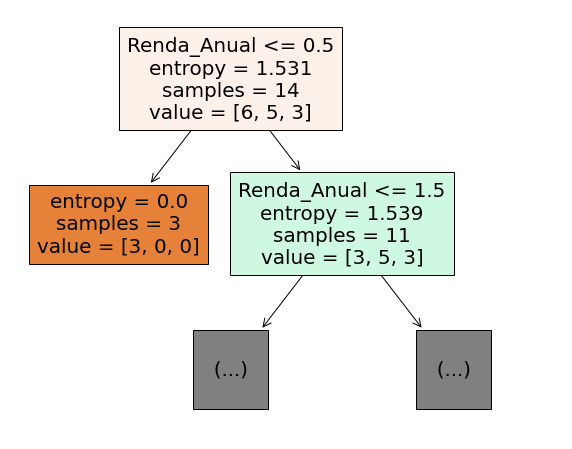

In [42]:
#Nó raiz
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(figsize=(10,8))
tree.plot_tree(modelo,feature_names=x.columns,max_depth=1,filled=True);

**Note que o valor da entropia foi o mesmo calculado sem usar o algoritimo**

## Visualizar a árvore de decisão Completa através do gráfico

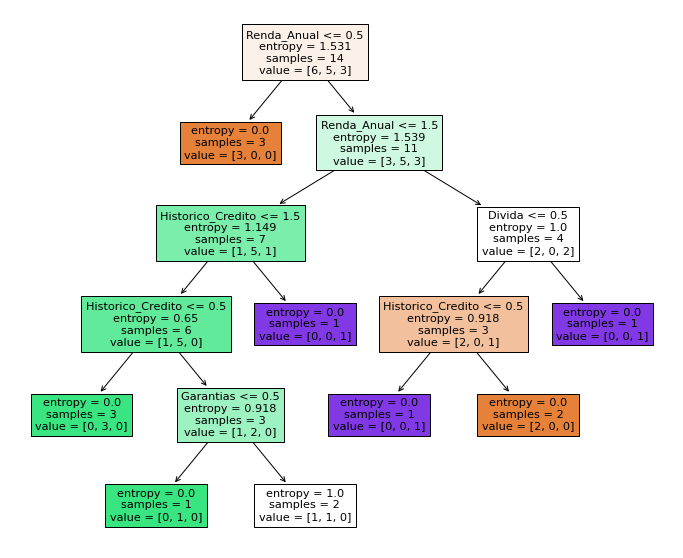

In [40]:
#Arvore completa
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(figsize=(12,10))
tree.plot_tree(modelo,feature_names=x.columns,max_depth=5,filled=True);

**Árvore de decisão completa**

# Conclusão:

**Quanto maior o valor da entropia na variavel target mais equilibrado as classes estarão, e quanto maior o valor do ganho de informação da variável explicativa, maior vai ser a redução da entropia na variável target, fazendo com que diminua a aleatoriedade nas classes** 